R-squared (R2): 0.8972102350051598


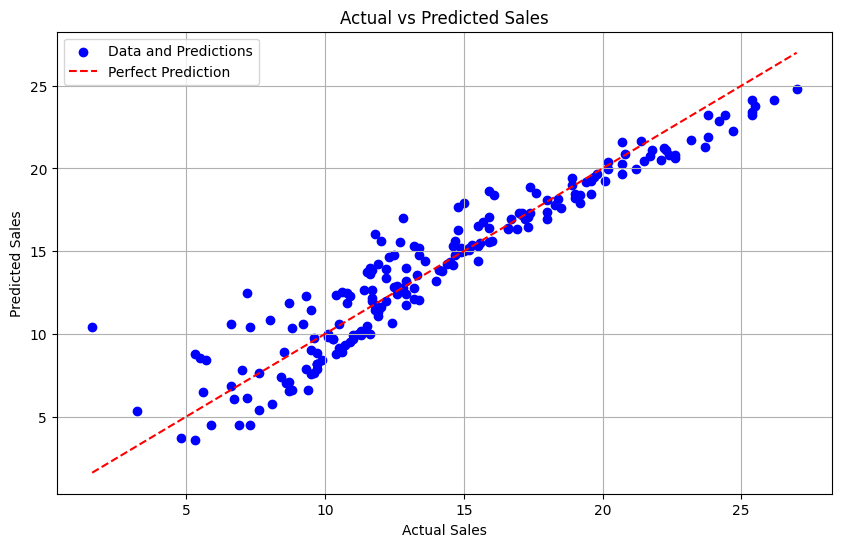

In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Load the 'Advertising.csv' dataset
data = pd.read_csv('Advertising.csv')

# Define input attributes (X) and output attribute (y)
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Feature scaling (optional but recommended for gradient descent)
X_scaled = (X - X.mean()) / X.std()
X_scaled['intercept'] = 1  # Add intercept term

# Initialize coefficients (weights) and learning rate
np.random.seed(42)  # for reproducibility
theta = np.random.randn(4)  # initialize random weights
learning_rate = 0.01
iterations = 1000

# Function to compute predictions
def predict(X, theta):
    return np.dot(X, theta)

# Function to compute gradient descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    for _ in range(iterations):
        predictions = predict(X, theta)
        errors = predictions - y
        gradient = (1/m) * np.dot(X.T, errors)
        theta -= learning_rate * gradient
    return theta

# Perform gradient descent to find the optimal weights
optimal_theta = gradient_descent(X_scaled.values, y.values, theta, learning_rate, iterations)

# Compute predictions using the optimal weights
y_pred = predict(X_scaled.values, optimal_theta)

# Calculate R-squared (R2)
r2 = r2_score(y, y_pred)
print("R-squared (R2):", r2)

# Plotting the best-fit regression line
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue', label='Data and Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.legend()
plt.grid(True)
plt.show()